<a href="https://colab.research.google.com/github/Angelica2929/BI_Project_AIRBNB/blob/main/Project_2_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Lerning Project!** 
# ***Airbnb Open Data***

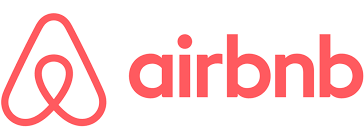


Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in New York City.

**Source**:https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv

**Acknowledgment**:This dataset is part of Airbnb Inside but I tried to make new columns and many data inconsistency issue to create a new dataset to practice data cleaning. 

The original source can be found here http://insideairbnb.com/explore/

# **AIM**
Whas is the price of a airbnb according to the location? I will focus in predict the price of a stay according to the location.

# **Loading Information**

Import the libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Load the datased chosen

In [15]:
df_airnb = pd.read_csv('/content/drive/MyDrive/CODING DOJO/Material Apoyo/Airbnb_Open_Data.csv', index_col = 'id')
#df_airnb = pd.read_csv("https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv",  index_col = 'id')
df_airnb.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploring the data**

In [17]:
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102599 entries, 1001254 to 6094647
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host id                         102599 non-null  int64  
 2   host_identity_verified          102310 non-null  object 
 3   host name                       102193 non-null  object 
 4   neighbourhood group             102570 non-null  object 
 5   neighbourhood                   102583 non-null  object 
 6   lat                             102591 non-null  float64
 7   long                            102591 non-null  float64
 8   country                         102067 non-null  object 
 9   country code                    102468 non-null  object 
 10  instant_bookable                102494 non-null  object 
 11  cancellation_policy             102523 non-null  object 
 12  room type

In [18]:
df_airnb.shape

(102599, 25)

In [19]:
df_airnb.size

2564975

Our dataset is shaped by a total of 2.667.574 registers, distribuited like this:


102.599 Rows
26 columnns , it means 25 columns conform the set of characteristics if I dont count my target variable.

In [20]:
df_airnb.describe()

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [21]:
df_airnb.describe().T

,count,mean,std,min,25%,50%,75%,max
host id,102599.0,4.925411e+10,2.853900e+10,1.236005e+08,2.458333e+10,4.911774e+10,7.399650e+10,9.876313e+10
lat,102591.0,4.072809e+01,5.585652e-02,4.049979e+01,4.068874e+01,4.072229e+01,4.076276e+01,4.091697e+01
long,102591.0,-7.394964e+01,4.952126e-02,-7.424984e+01,-7.398258e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,102385.0,2.012487e+03,5.765556e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,102190.0,8.135845e+00,3.055378e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,102416.0,2.748374e+01,4.950895e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,1.024000e+03
reviews per month,86720.0,1.374022e+00,1.746621e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.000000e+00,9.000000e+01
review rate number,102273.0,3.279106e+00,1.284657e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,102280.0,7.936605e+00,3.221878e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.320000e+02
availability 365,102151.0,1.411333e+02,1.354350e+02,-1.000000e+01,3.000000e+00,9.600000e+01,2.690000e+02,3.677000e+03


# **Cleaning our data**

In [22]:
df_airnb.isna().sum().sort_values(ascending=False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
host id                                0
room type       

In [23]:
print(df_airnb.isna().sum().sum(), 'missing values')

190769 missing values


Findings:

*There are 190.769 missing values

*The dataset is shaped by categorical and numerical variables

In [24]:
df_airnb.duplicated().sum()

541

The dataset has 541 duplicated values, we just have to remove them.

In [25]:
df_airnb = df_airnb.drop_duplicates()
df_airnb.duplicated().sum()

0

The duplicates were removed.

In [26]:
df = pd.DataFrame(df_airnb)
df = df_airnb.fillna(0)


In [27]:
datos_null = ['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',]
for dato in datos_null:
    q_null = df_airnb[df_airnb[dato] == 0][dato].count()
    print(f'{dato} contiene {q_null} datos null: Representan el {round(q_null*100/df["price"].count(), 2)}% del conjunto de datos')

neighbourhood group contiene 0 datos null: Representan el 0.0% del conjunto de datos
neighbourhood contiene 0 datos null: Representan el 0.0% del conjunto de datos
lat contiene 0 datos null: Representan el 0.0% del conjunto de datos
long contiene 0 datos null: Representan el 0.0% del conjunto de datos
country contiene 0 datos null: Representan el 0.0% del conjunto de datos
country code contiene 0 datos null: Representan el 0.0% del conjunto de datos
instant_bookable contiene 51186 datos null: Representan el 50.15% del conjunto de datos
cancellation_policy contiene 0 datos null: Representan el 0.0% del conjunto de datos
room type contiene 0 datos null: Representan el 0.0% del conjunto de datos
Construction year contiene 0 datos null: Representan el 0.0% del conjunto de datos
price contiene 0 datos null: Representan el 0.0% del conjunto de datos
service fee contiene 0 datos null: Representan el 0.0% del conjunto de datos
minimum nights contiene 0 datos null: Representan el 0.0% del conju

For the Instant Bookable column, the number 0 does not indicate null data, since it is a null type variable, values are replaced by 1 and 0, so they should not be eliminated.

In [28]:
columns_names = df_airnb.columns.values
columns_names

array(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'room type', 'Construction year', 'price', 'service fee',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365',
       'house_rules', 'license'], dtype=object)

I eliminate LICENSE COLUMN, it is completely empty.
Also Columns like house rules, guest's name , host id and host name are irrelevant to predict the price of a airbnb stay, for that reason I eliminate them. **texto en negrita**

In [29]:
df_airnb = df_airnb.drop(columns=['license','house_rules','NAME','host id','host_identity_verified','host name'])
df_airnb.head()

,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,
1001254,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1002102,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
1002403,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
1002755,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
1003689,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


**Ensure Consistency in Categorical Values!**

In [30]:
df_airnb['neighbourhood group'].unique()
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('brookln', 'Brooklyn') 
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('manhatan', 'Manhattan')
df_airnb['neighbourhood group'] = df_airnb['neighbourhood group'].replace('nan', 'Missing')
df_airnb['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

In [31]:
df_airnb['neighbourhood group'].value_counts()

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

Non-uniform categorical data is identified, the data is cleaned.

In [32]:
df_airnb['neighbourhood'].value_counts()

Bedford-Stuyvesant        7898
Williamsburg              7732
Harlem                    5441
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64

In [33]:
df_airnb['instant_bookable'].value_counts()

False    51186
True     50767
Name: instant_bookable, dtype: int64

This variable is of type variable, the values 0 do not indicate null numbers, it identifies that the value of the boolean variable is TRUE.

In [34]:
df_airnb['room type'].value_counts()

Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64

In [35]:
df_airnb['cancellation_policy'].value_counts()

moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64

In [36]:
df_airnb['review rate number'].value_counts()

5.0    23251
4.0    23200
3.0    23130
2.0    22972
1.0     9186
Name: review rate number, dtype: int64

We just have 29 values with 0, I replace them with Missing

In [37]:
df_airnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [38]:
df_airnb.shape
df_airnb.nunique()

neighbourhood group                   5
neighbourhood                       224
lat                               21991
long                              17774
country                               1
country code                          1
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1151
service fee                         231
minimum nights                      153
number of reviews                   476
last review                        2477
reviews per month                  1016
review rate number                    5
calculated host listings count       78
availability 365                    438
dtype: int64

It is necessary to correct the data types, it shows the price variable when it has a peso sign, it appears as a categorical variable when it is a number, therefore we must adjust it.

In [39]:
df_airnb["price"]

id
1001254       $966 
1002102       $142 
1002403       $620 
1002755       $368 
1003689       $204 
             ...   
57365208      $696 
57365760      $909 
57366313      $387 
57366865      $848 
57367417    $1,128 
Name: price, Length: 102058, dtype: object

In [60]:
df_airnb["price"] = df_airnb["price"].apply(lambda x: str(x).replace("$", ""))
df_airnb["price"] = df_airnb["price"].apply(lambda x: str(x).replace("$", ""))
df_airnb['price'] = df_airnb['price'].astype(float)
df_airnb.price

id
1001254      966.0
1002102      142.0
1002403      620.0
1002755      368.0
1003689      204.0
             ...  
57365208     696.0
57365760     909.0
57366313     387.0
57366865     848.0
57367417    1128.0
Name: price, Length: 101363, dtype: float64

In [70]:
df_airnb["service fee"] = df_airnb["service fee"].apply(lambda x: str(x).replace("$", ""))
df_airnb['service fee'] = df_airnb['service fee'].astype(float)
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101363 entries, 1001254 to 57367417
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   neighbourhood group             101346 non-null  object        
 1   neighbourhood                   101349 non-null  object        
 2   lat                             101355 non-null  float64       
 3   long                            101355 non-null  float64       
 4   country                         100843 non-null  object        
 5   country code                    101244 non-null  object        
 6   instant_bookable                101270 non-null  object        
 7   cancellation_policy             101299 non-null  object        
 8   room type                       101363 non-null  object        
 9   Construction year               101172 non-null  float64       
 10  price                           101363 non-null 

In [43]:
df_airnb['price'] = df_airnb['price'].astype(float)
df_airnb.price

id
1001254      966.0
1002102      142.0
1002403      620.0
1002755      368.0
1003689      204.0
             ...  
57365208     696.0
57365760     909.0
57366313     387.0
57366865     848.0
57367417    1128.0
Name: price, Length: 102058, dtype: float64

In [46]:
df_airnb.dropna(subset=['price'], inplace=True)
df_airnb.isna().sum()

neighbourhood group                  28
neighbourhood                        15
lat                                   8
long                                  8
country                             527
country code                        126
instant_bookable                    100
cancellation_policy                  71
room type                             0
Construction year                   210
price                                 0
service fee                         239
minimum nights                      400
number of reviews                   183
last review                       15806
reviews per month                 15791
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [47]:
df_airnb['price'].isna().sum()

0

The data type of the Last Review column is changed from object to date, like this.

In [48]:
df_airnb['last review'] = pd.to_datetime(df_airnb['last review'])
df_airnb.dtypes

neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
dtype: object

In [49]:
df_airnb.dropna(subset=['availability 365'], inplace=True)
df_airnb.isna().sum()

neighbourhood group                  17
neighbourhood                        14
lat                                   8
long                                  8
country                             520
country code                        119
instant_bookable                     93
cancellation_policy                  64
room type                             0
Construction year                   191
price                                 0
service fee                         239
minimum nights                      378
number of reviews                   129
last review                       15538
reviews per month                 15530
review rate number                  305
calculated host listings count      319
availability 365                      0
dtype: int64

In [50]:
df_airnb['availability 365'] = df_airnb['availability 365'].astype(int)


In [51]:
df_airnb.isna().sum()

neighbourhood group                  17
neighbourhood                        14
lat                                   8
long                                  8
country                             520
country code                        119
instant_bookable                     93
cancellation_policy                  64
room type                             0
Construction year                   191
price                                 0
service fee                         239
minimum nights                      378
number of reviews                   129
last review                       15538
reviews per month                 15530
review rate number                  305
calculated host listings count      319
availability 365                      0
dtype: int64

In [52]:
df_airnb.dropna(subset=['availability 365'], inplace=True)
df_airnb.isna().sum()

neighbourhood group                  17
neighbourhood                        14
lat                                   8
long                                  8
country                             520
country code                        119
instant_bookable                     93
cancellation_policy                  64
room type                             0
Construction year                   191
price                                 0
service fee                         239
minimum nights                      378
number of reviews                   129
last review                       15538
reviews per month                 15530
review rate number                  305
calculated host listings count      319
availability 365                      0
dtype: int64

In [53]:
df_airnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101363 entries, 1001254 to 57367417
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   neighbourhood group             101346 non-null  object        
 1   neighbourhood                   101349 non-null  object        
 2   lat                             101355 non-null  float64       
 3   long                            101355 non-null  float64       
 4   country                         100843 non-null  object        
 5   country code                    101244 non-null  object        
 6   instant_bookable                101270 non-null  object        
 7   cancellation_policy             101299 non-null  object        
 8   room type                       101363 non-null  object        
 9   Construction year               101172 non-null  float64       
 10  price                           101363 non-null 

In [54]:
df.dropna(subset=['neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy',
       'Construction year', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count'], inplace=True)
df.isna().sum()

NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

In [55]:
df.shape

(102058, 25)

In [56]:
df.isna().sum()

NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
license                           0
dtype: int64

There are no Nan Values, they were eliminated because the represented a 
low proportion with respect to the totality of the data

# **Data Visualization**

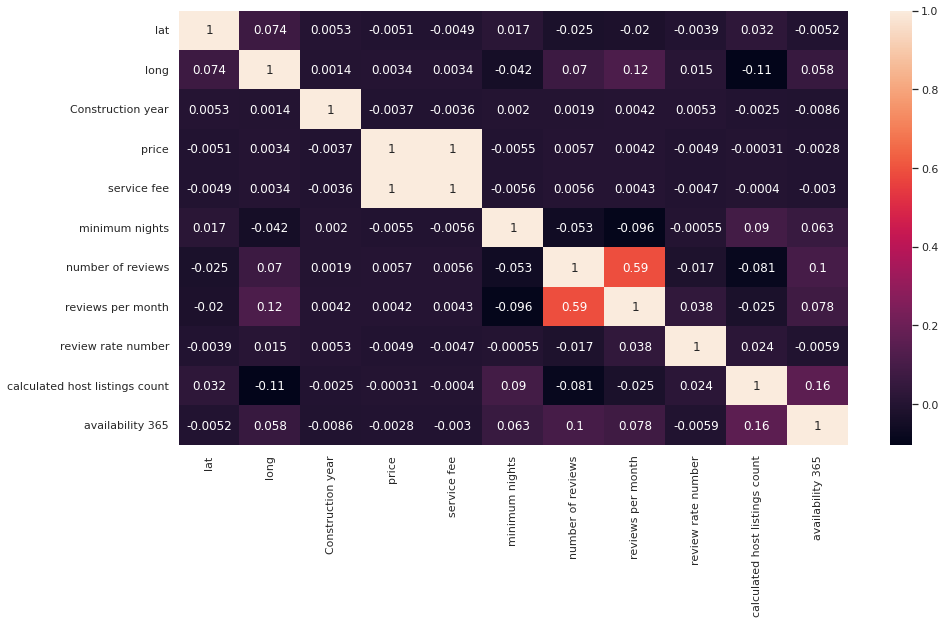

In [97]:
import seaborn as sns
corr = df_airnb.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_airnb.corr(),annot = True)


I noticed strong correlation between service fee and price . It is important to highlight that the correlation among our variable target and the other is pretty low, but price has the stronger correlation with number of reviews.

In [144]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

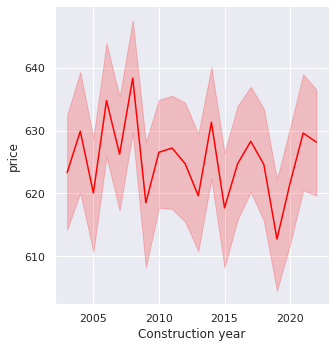

In [163]:
sns.relplot(x = df_airnb['Construction year'], y = df_airnb['price'], data = df_airnb, kind = "line", color='#FF0000');

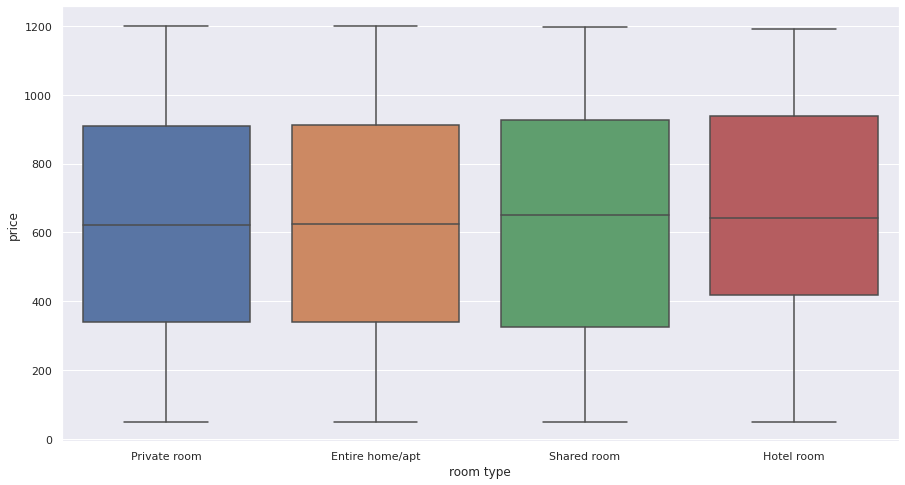

In [155]:
sns.boxplot(y = 'price',       
            x = 'room type',    
            data = df_airnb
            )

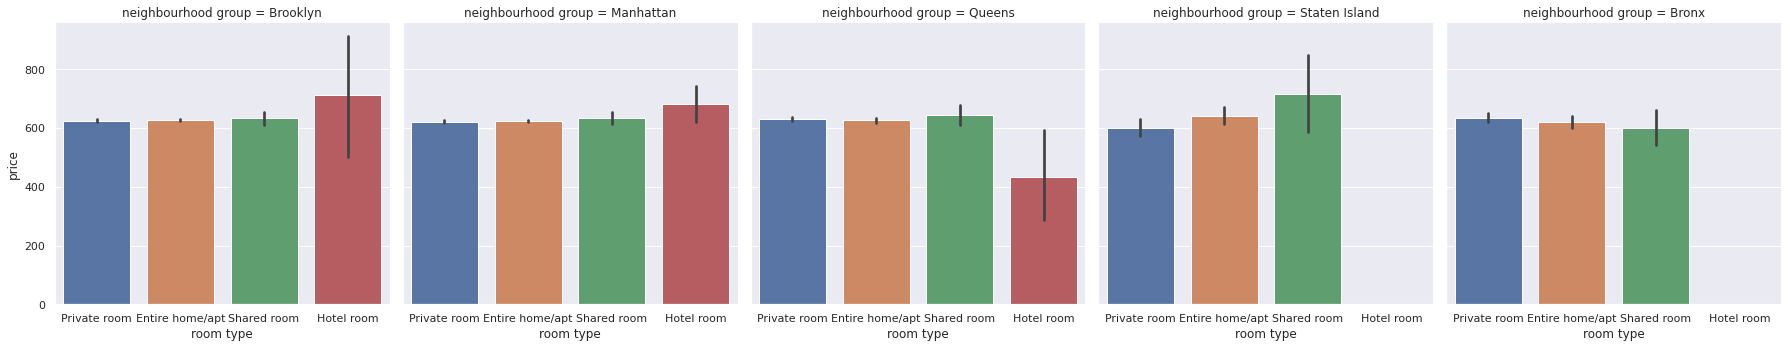

In [103]:
sns.catplot(x="room type", y="price", col="neighbourhood group", data=df_airnb, kind = "bar");

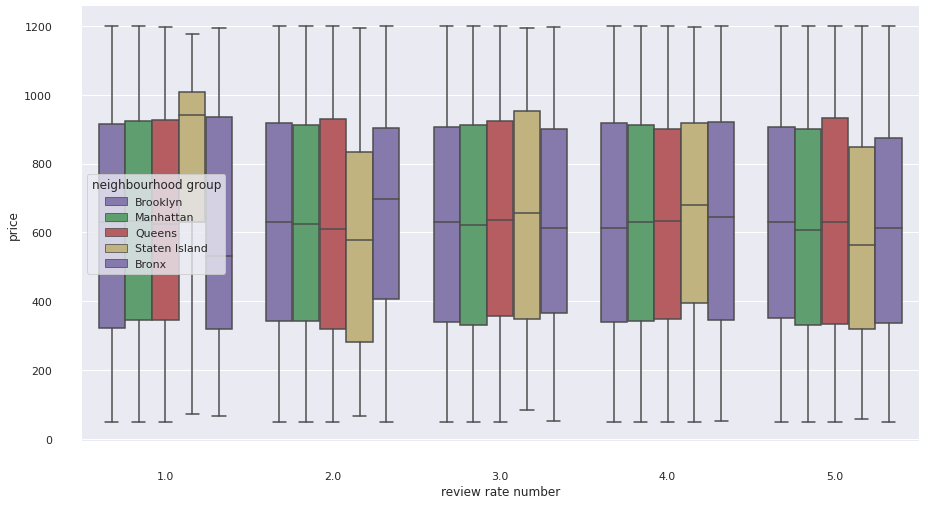

In [124]:
sns.boxplot(x="review rate number", y="price",
            hue="neighbourhood group", palette=["m", "g","r","y"],
            data=df_airnb)
sns.despine(offset=20, trim=True)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

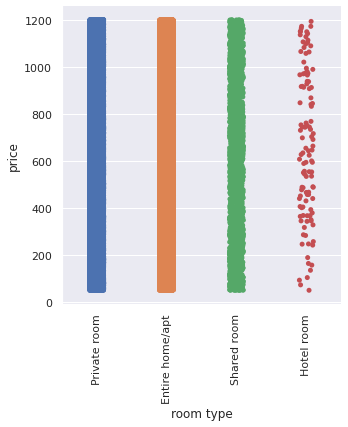

In [125]:
sns.catplot(kind="strip",data=df_airnb, x='room type', y='price')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

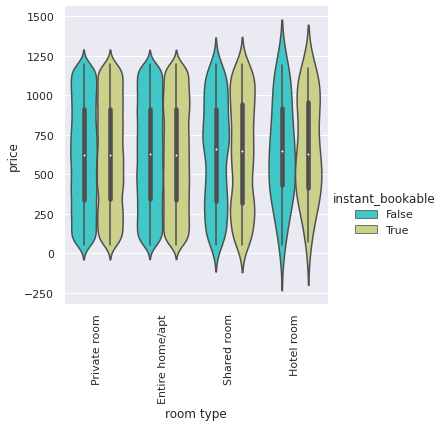

In [131]:
sns.catplot(kind="violin",data=df_airnb, x='room type', y='price', hue='instant_bookable', palette = 'rainbow')
plt.xticks(rotation = 90)

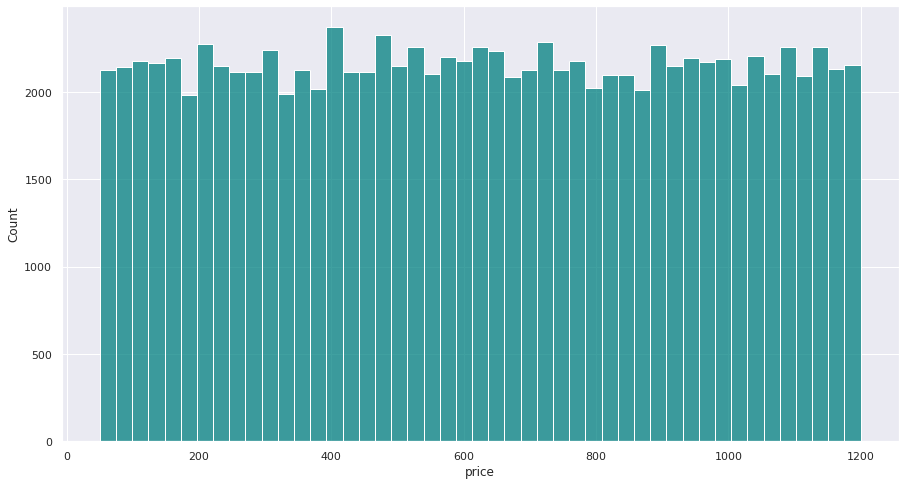

In [139]:
sns.histplot(data=df_airnb, x="price", color= '#008080')
